# Determines

The 2012 US Army Anthropometric Survey (ANSUR II) was executed by the Natick Soldier Research, Development and Engineering Center (NSRDEC) from October 2010 to April 2012 and is comprised of personnel representing the total US Army force to include the US Army Active Duty, Reserves, and National Guard. In addition to the anthropometric and demographic data described below, the ANSUR II database also consists of 3D whole body, foot, and head scans of Soldier participants. These 3D data are not publicly available out of respect for the privacy of ANSUR II participants. The data from this survey are used for a wide range of equipment design, sizing, and tariffing applications within the military and has many potential commercial, industrial, and academic applications.

The ANSUR II working databases contain 93 anthropometric measurements which were directly measured, and 15 demographic/administrative variables explained below. The ANSUR II Male working database contains a total sample of 4,082 subjects. The ANSUR II Female working database contains a total sample of 1,986 subjects.


DATA DICT:
https://data.world/datamil/ansur-ii-data-dictionary/workspace/file?filename=ANSUR+II+Databases+Overview.pdf

---

To achieve high prediction success, you must understand the data well and develop different approaches that can affect the dependent variable.

Firstly, try to understand the dataset column by column using pandas module. Do research within the scope of domain (body scales, and race characteristics) knowledge on the internet to get to know the data set in the fastest way.

You will implement ***Logistic Regression, Support Vector Machine, XGBoost, Random Forest*** algorithms. Also, evaluate the success of your models with appropriate performance metrics.

At the end of the project, choose the most successful model and try to enhance the scores with ***SMOTE*** make it ready to deploy. Furthermore, use ***SHAP*** to explain how the best model you choose works.

# Tasks

#### 1. Exploratory Data Analysis (EDA)
- Import Libraries, Load Dataset, Exploring Data

    *i. Import Libraries*
    
    *ii. Ingest Data*
    
    *iii. Explore Data*
    
    *iv. Outlier Detection*
    
    *v.  Drop unnecessary features*

#### 2. Data Preprocessing
- Scale (if needed)
- Separete the data frame for evaluation purposes

#### 3. Multi-class Classification
- Import libraries
- Implement SVM Classifer
- Implement Decision Tree Classifier
- Implement Random Forest Classifer
- Implement XGBoost Classifer
- Compare The Models



# EDA
- Drop unnecessary colums
- Drop DODRace class if value count below 500 (we assume that our data model can't learn if it is below 500)

## Import Libraries
Besides Numpy and Pandas, you need to import the necessary modules for data visualization, data preprocessing, Model building and tuning.

*Note: Check out the course materials.*

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from ipywidgets import interact

from sklearn.model_selection import cross_validate, GridSearchCV
from sklearn.metrics import (
    accuracy_score,
    f1_score,
    recall_score,
    precision_score,
    make_scorer,
    classification_report,
    confusion_matrix,
    ConfusionMatrixDisplay,
    average_precision_score,
    roc_curve,
    auc,
)

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

import warnings

warnings.filterwarnings("ignore")

pd.set_option("display.max_rows", 1000)
pd.set_option("display.max_columns", 1000)
pd.set_option("display.width", 1000)

ModuleNotFoundError: No module named 'xgboost'

In [114]:
from xgboost import XGBClassifier

In [113]:
# To install in the root environment
!pip install -U xgboost


  Obtaining dependency information for xgboost from https://files.pythonhosted.org/packages/32/10/4689bda37403f7dd029d550c4446e0097c2f33b8ae877b235e76d5c49bc2/xgboost-2.0.0-py3-none-win_amd64.whl.metadata
   ---------------------------------------- 0.0/99.7 MB ? eta -:--:--
   ---------------------------------------- 0.0/99.7 MB ? eta -:--:--
   ---------------------------------------- 0.0/99.7 MB ? eta -:--:--
   ---------------------------------------- 0.0/99.7 MB 326.8 kB/s eta 0:05:06
   ---------------------------------------- 0.1/99.7 MB 525.1 kB/s eta 0:03:10
   ---------------------------------------- 0.1/99.7 MB 544.7 kB/s eta 0:03:03
   ---------------------------------------- 0.1/99.7 MB 566.5 kB/s eta 0:02:56
   ---------------------------------------- 0.2/99.7 MB 583.1 kB/s eta 0:02:51
   ---------------------------------------- 0.2/99.7 MB 565.6 kB/s eta 0:02:57
   ---------------------------------------- 0.3/99.7 MB 628.5 kB/s eta 0:02:39
   -----------------------------

## Ingest Data from links below and make a dataframe
- Soldiers Male : https://query.data.world/s/h3pbhckz5ck4rc7qmt2wlknlnn7esr
- Soldiers Female : https://query.data.world/s/sq27zz4hawg32yfxksqwijxmpwmynq

In [2]:
df_male = pd.read_csv("ANSUR II MALE Public (1).csv",encoding='latin-1')

In [3]:
df_female = pd.read_csv("ANSUR II FEMALE Public.csv")

# EDA
- Drop unnecessary colums
- Drop DODRace class if value count below 500 (we assume that our data model can't learn if it is below 500)

In [4]:
df_male.head()

,subjectid,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,...,Branch,PrimaryMOS,SubjectsBirthLocation,SubjectNumericRace,Ethnicity,DODRace,Age,Heightin,Weightlbs,WritingPreference
0,10027,266,1467,337,222,1347,253,202,401,369,...,Combat Arms,19D,North Dakota,1,NaN,1,41,71,180,Right hand
1,10032,233,1395,326,220,1293,245,193,394,338,...,Combat Support,68W,New York,1,NaN,1,35,68,160,Left hand
2,10033,287,1430,341,230,1327,256,196,427,408,...,Combat Support,68W,New York,2,NaN,2,42,68,205,Left hand
3,10092,234,1347,310,230,1239,262,199,401,359,...,Combat Service Support,88M,Wisconsin,1,NaN,1,31,66,175,Right hand
4,10093,250,1585,372,247,1478,267,224,435,356,...,Combat Service Support,92G,North Carolina,2,NaN,2,21,77,213,Right hand


In [5]:
df_female.head()

,SubjectId,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,...,Branch,PrimaryMOS,SubjectsBirthLocation,SubjectNumericRace,Ethnicity,DODRace,Age,Heightin,Weightlbs,WritingPreference
0,10037,231,1282,301,204,1180,222,177,373,315,...,Combat Support,92Y,Germany,2,NaN,2,26,61,142,Right hand
1,10038,194,1379,320,207,1292,225,178,372,272,...,Combat Service Support,25U,California,3,Mexican,3,21,64,120,Right hand
2,10042,183,1369,329,233,1271,237,196,397,300,...,Combat Service Support,35D,Texas,1,NaN,1,23,68,147,Right hand
3,10043,261,1356,306,214,1250,240,188,384,364,...,Combat Service Support,25U,District of Columbia,8,Caribbean Islander,2,22,66,175,Right hand
4,10051,309,1303,308,214,1210,217,182,378,320,...,Combat Arms,42A,Texas,1,NaN,1,45,63,195,Right hand


In [6]:
df_female.rename(columns={"SubjectId": "subjectid"}, inplace=True)

In [7]:
print(df_male.shape)
print(df_female.shape)

(4082, 108)
(1986, 108)


In [9]:
df = pd.concat([df_male, df_female], axis=0, ignore_index=True)


In [10]:
df.shape

(6068, 108)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6068 entries, 0 to 6067
Columns: 108 entries, subjectid to WritingPreference
dtypes: int64(99), object(9)
memory usage: 5.0+ MB


In [12]:
df.info(max_cols=110)

# If we want to see the information of all features in dfs with
# many features, we can set max_cols to a higher value.
# or you can use verbose=True in df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6068 entries, 0 to 6067
Data columns (total 108 columns):
 #    Column                          Non-Null Count  Dtype 
---   ------                          --------------  ----- 
 0    subjectid                       6068 non-null   int64 
 1    abdominalextensiondepthsitting  6068 non-null   int64 
 2    acromialheight                  6068 non-null   int64 
 3    acromionradialelength           6068 non-null   int64 
 4    anklecircumference              6068 non-null   int64 
 5    axillaheight                    6068 non-null   int64 
 6    balloffootcircumference         6068 non-null   int64 
 7    balloffootlength                6068 non-null   int64 
 8    biacromialbreadth               6068 non-null   int64 
 9    bicepscircumferenceflexed       6068 non-null   int64 
 10   bicristalbreadth                6068 non-null   int64 
 11   bideltoidbreadth                6068 non-null   int64 
 12   bimalleolarbreadth              

In [13]:
df.isnull().sum().any()

True

In [14]:
df.duplicated().sum()

0

In [23]:
print(df["DODRace"].value_counts())

DODRace
1    3792
2    1298
3     679
4     188
6      59
5      49
8       3
Name: count, dtype: int64


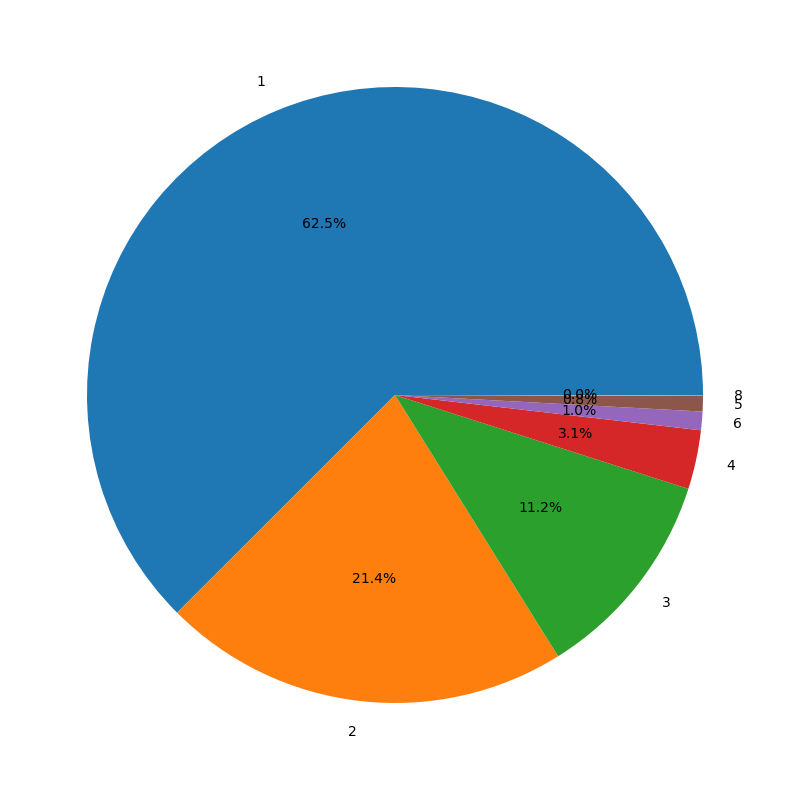

In [25]:

df["DODRace"].value_counts().plot(kind="pie", autopct="%1.1f%%",subplots=True, figsize=(10, 10))
plt.ylabel("");

In [26]:
drop_list = []
for col in df:
    if df[col].isnull().sum() > 0:
        print(f"{col} = {df[col].isnull().sum()}")
        drop_list.append(col)


drop_list



Ethnicity = 4647


['Ethnicity']

In [27]:
df.drop(columns=drop_list, inplace=True)

In [28]:
df.isnull().sum().any()

False

In [29]:
df.shape


(6068, 107)

In [30]:
# to find how many unique values object features have
for col in df.select_dtypes("object"):
    print(f"{col} has {df[col].nunique()} unique value")

# We check our unique categorical observation numbers.
# We will drop the feature (Date), which shows the body measurement dates,
# the units where the measurements are done (installation),
# the specialty of the soldiers (PrimaryMOS) will not provide insight into races.

# We will check below whether the unit (componenet) where the soldiers are working
# and the branch (branch) they are working with have an effect.
# (Like blacks with relatively better physical strength come to the fore)

Gender has 2 unique value
Date has 253 unique value
Installation has 12 unique value
Component has 3 unique value
Branch has 3 unique value
PrimaryMOS has 285 unique value
SubjectsBirthLocation has 152 unique value
WritingPreference has 3 unique value


In [31]:
df.SubjectsBirthLocation.value_counts()

SubjectsBirthLocation
California       446
New York         420
Texas            397
Indiana          266
Oklahoma         221
                ... 
Ivory Coast        1
Belarus            1
New Zealand        1
South America      1
Denmark            1
Name: count, Length: 152, dtype: int64

In [32]:
np.mean(df.SubjectsBirthLocation.value_counts())

39.921052631578945

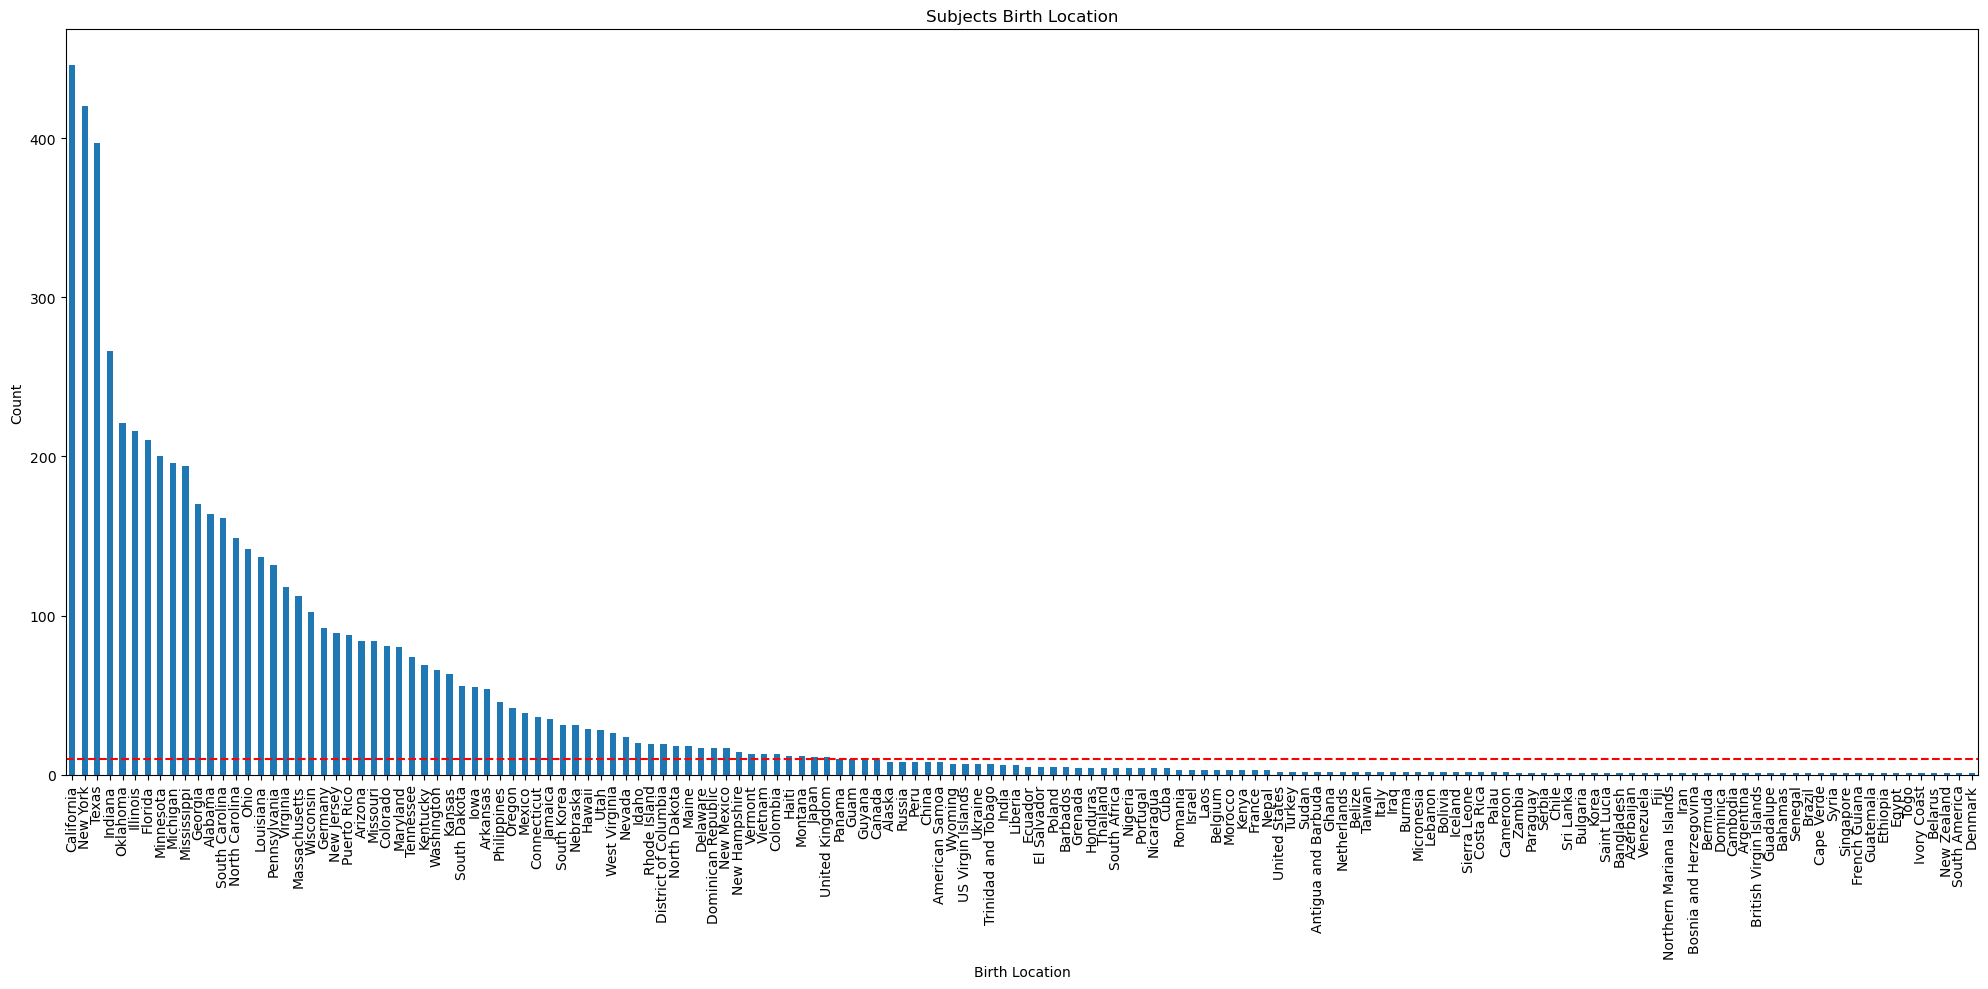

In [33]:
df.SubjectsBirthLocation.value_counts().plot(kind="bar", figsize=(20,10))
plt.title("Subjects Birth Location")
plt.xlabel("Birth Location")
plt.ylabel("Count")
plt.axhline(10, color='r', linestyle='--')  # Some research says 10 rows are enough for each category to be represented
plt.tight_layout();

In [34]:
# This is a dictionary of states and their regions.
states_by_region = {
    "Alabama": "South",
    "Alaska": "West",
    "Arizona": "West",
    "Arkansas": "South",
    "California": "West",
    "Colorado": "West",
    "Connecticut": "Northeast",
    "Delaware": "Mid Atlantic",
    "Florida": "South",
    "Georgia": "South",
    "Hawaii": "West",
    "Idaho": "West",
    "Illinois": "Midwest",
    "Indiana": "Midwest",
    "Iowa": "Midwest",
    "Kansas": "Midwest",
    "Kentucky": "South",
    "Louisiana": "South",
    "Maine": "Northeast",
    "Maryland": "Mid Atlantic",
    "Massachusetts": "Northeast",
    "Michigan": "Midwest",
    "Minnesota": "Midwest",
    "Mississippi": "South",
    "Missouri": "Midwest",
    "Montana": "West",
    "Nebraska": "Midwest",
    "Nevada": "West",
    "New Hampshire": "Northeast",
    "New Jersey": "Mid Atlantic",
    "New Mexico": "West",
    "New York": "Northeast",
    "North Carolina": "South",
    "North Dakota": "Midwest",
    "Ohio": "Midwest",
    "Oklahoma": "South",
    "Oregon": "West",
    "Pennsylvania": "Mid Atlantic",
    "Rhode Island": "Northeast",
    "South Carolina": "South",
    "South Dakota": "Midwest",
    "Tennessee": "South",
    "Texas": "South",
    "Utah": "West",
    "Vermont": "Northeast",
    "Virginia": "Mid Atlantic",
    "Washington": "West",
    "West Virginia": "South",
    "Wisconsin": "Midwest",
    "Wyoming": "West",
    "District of Columbia": "Mid Atlantic"
}


In [35]:
# This is a dictionary of the countries and their continents.
countries_by_continent = {
    "Afghanistan": "Asia",
    "Albania": "Europe",
    "Algeria": "Africa",
    "American Samoa": "Oceania",
    "Andorra": "Europe",
    "Angola": "Africa",
    "Antigua and Barbuda": "North America",
    "Argentina": "South America",
    "Armenia": "Asia",
    "Australia": "Oceania",
    "Austria": "Europe",
    "Azerbaijan": "Asia",
    "Bahamas": "North America",
    "Bahrain": "Asia",
    "Bangladesh": "Asia",
    "Barbados": "North America",
    "Belarus": "Europe",
    "Belgium": "Europe",
    "Belize": "North America",
    "Benin": "Africa",
    "Bhutan": "Asia",
    "Bolivia": "South America",
    "Bosnia and Herzegovina": "Europe",
    "Botswana": "Africa",
    "Brazil": "South America",
    "British Virgin Islands": "North America",
    "Brunei": "Asia",
    "Bulgaria": "Europe",
    "Burkina Faso": "Africa",
    "Burundi": "Africa",
    "Cambodia": "Asia",
    "Cameroon": "Africa",
    "Canada": "North America",
    "Cape Verde": "Africa",
    "Central African Republic": "Africa",
    "Chad": "Africa",
    "Chile": "South America",
    "China": "Asia",
    "Colombia": "South America",
    "Comoros": "Africa",
    "Congo, Democratic Republic of the": "Africa",
    "Congo, Republic of the": "Africa",
    "Costa Rica": "North America",
    "Côte d'Ivoire": "Africa",
    "Croatia": "Europe",
    "Cuba": "North America",
    "Cyprus": "Europe",
    "Czech Republic": "Europe",
    "Denmark": "Europe",
    "Djibouti": "Africa",
    "Dominica": "North America",
    "Dominican Republic": "North America",
    "East Timor": "Asia",
    "Ecuador": "South America",
    "Egypt": "Africa",
    "El Salvador": "North America",
    "England": "Europe",
    "Equatorial Guinea": "Africa",
    "Eritrea": "Africa",
    "Estonia": "Europe",
    "Eswatini": "Africa",
    "Ethiopia": "Africa",
    "Federated States of Micronesia": "Oceania",
    "Fiji": "Oceania",
    "Finland": "Europe",
    "France": "Europe",
    "French Guiana": "South America",
    "Gabon": "Africa",
    "Gambia": "Africa",
    "Georgia": "Asia",
    "Germany": "Europe",
    "Ghana": "Africa",
    "Greece": "Europe",
    "Grenada": "North America",
    "Guam": "Oceania",
    "Guadalupe" : "North America",
    "Guatemala": "North America",
    "Guinea": "Africa",
    "Guinea-Bissau": "Africa",
    "Guyana": "South America",
    "Haiti": "North America",
    "Honduras": "North America",
    "Hungary": "Europe",
    "Iceland": "Europe",
    "India": "Asia",
    "Indonesia": "Asia",
    "Iran": "Asia",
    "Iraq": "Asia",
    "Ireland": "Europe",
    "Israel": "Asia",
    "Italy": "Europe",
    "Ivory Coast": "Africa",
    "Jamaica": "North America",
    "Japan": "Asia",
    "Jordan": "Asia",
    "Kazakhstan": "Asia",
    "Kenya": "Africa",
    "Kiribati": "Oceania",
    "Kosovo": "Europe",
    "Kuwait": "Asia",
    "Kyrgyzstan": "Asia",
    "Laos": "Asia",
    "Latvia": "Europe",
    "Lebanon": "Asia",
    "Lesotho": "Africa",
    "Liberia": "Africa",
    "Libya": "Africa",
    "Liechtenstein": "Europe",
    "Lithuania": "Europe",
    "Luxembourg": "Europe",
    "Macedonia, Republic of": "Europe",
    "Madagascar": "Africa",
    "Malawi": "Africa",
    "Malaysia": "Asia",
    "Maldives": "Asia",
    "Mali": "Africa",
    "Malta": "Europe",
    "Marshall Islands": "Oceania",
    "Mauritania": "Africa",
    "Mauritius": "Africa",
    "Mexico": "North America",
    "Micronesia": "Oceania",
    "Moldova": "Europe",
    "Monaco": "Europe",
    "Mongolia": "Asia",
    "Montenegro": "Europe",
    "Morocco": "Africa",
    "Mozambique": "Africa",
    "Myanmar (Burma)": "Asia",
    "Namibia": "Africa",
    "Nauru": "Oceania",
    "Nepal": "Asia",
    "Netherlands": "Europe",
    "New Zealand": "Oceania",
    "Nicaragua": "North America",
    "Niger": "Africa",
    "Nigeria": "Africa",
    "North Korea": "Asia",
    "Norway": "Europe",
    "Oman": "Asia",
    "Pakistan": "Asia",
    "Palau": "Oceania",
    "Palestine": "Asia",
    "Panama": "North America",
    "Papua New Guinea": "Oceania",
    "Paraguay": "South America",
    "Peru": "South America",
    "Philippines": "Asia",
    "Poland": "Europe",
    "Portugal": "Europe",
    "Puerto Rico": "North America",
    "Qatar": "Asia",
    "Romania": "Europe",
    "Russia": "Europe",
    "Rwanda": "Africa",
    "Saint Kitts and Nevis": "North America",
    "Saint Lucia": "North America",
    "Saint Vincent and the Grenadines": "North America",
    "Samoa": "Oceania",
    "San Marino": "Europe",
    "Sao Tome and Principe": "Africa",
    "Saudi Arabia": "Asia",
    "Scotland": "Europe",
    "Senegal": "Africa",
    "Serbia": "Europe",
    "Seychelles": "Africa",
    "Sierra Leone": "Africa",
    "Singapore": "Asia",
    "Slovakia": "Europe",
    "Slovenia": "Europe",
    "Solomon Islands": "Oceania",
    "Somalia": "Africa",
    "South Africa": "Africa",
    "South Korea": "Asia",
    "South Sudan": "Africa",
    "Spain": "Europe",
    "Sri Lanka": "Asia",
    "Sudan": "Africa",
    "Suriname": "South America",
    "Swaziland": "Africa",
    "Sweden": "Europe",
    "Switzerland": "Europe",
    "Syria": "Asia",
    "Taiwan": "Asia",
    "Tajikistan": "Asia",
    "Tanzania": "Africa",
    "Thailand": "Asia",
    "Togo": "Africa",
    "Tonga": "Oceania",
    "Trinidad and Tobago": "North America",
    "Tunisia": "Africa",
    "Turkey": "Europe",
    "Turkmenistan": "Asia",
    "Tuvalu": "Oceania",
    "Uganda": "Africa",
    "Ukraine": "Europe",
    "United Arab Emirates": "Asia",
    "United Kingdom": "Europe",
    "United States": "North America",
    "Uruguay": "South America",
    "US Virgin Islands": "North America",
    "Uzbekistan": "Asia",
    "Vanuatu": "Oceania",
    "Vatican City": "Europe",
    "Venezuela": "South America",
    "Vietnam": "Asia",
    "Wales": "Europe",
    "Yemen": "Asia",
    "Zambia": "Africa",
    "Zimbabwe": "Africa",
    "South America": "South America",
    "Burma": "Asia",
    "Korea": "Asia",
    "Northern Mariana Islands": "Oceania",
    "Bermuda": "North America",
}


In [36]:
# to overcome the high cardinality problem in the SubjectsBirthLocation feature.
# We will use the following approach:
# 1. We will create a dictionary with the states by region
# 2. We will create a dictionary with the countries by continent
# 3. We will replace the values in the column "SubjectsBirthLocation" with the values from the dictionaries

df["SubjectsBirthLocation"] = [i if i in states_by_region else countries_by_continent[i] for i in df["SubjectsBirthLocation"].values ]
df["SubjectsBirthLocation"].value_counts()

# We tired this but it didn't work well.
# df["SubjectsBirthLocation"] = [states_by_region[i] if i in states_by_region else countries_by_continent[i] for i in df["SubjectsBirthLocation"].values ]
# df["SubjectsBirthLocation"].value_counts()

SubjectsBirthLocation
California              446
New York                420
Texas                   397
Indiana                 266
North America           265
Oklahoma                221
Illinois                216
Florida                 210
Minnesota               200
Michigan                196
Mississippi             194
Georgia                 170
Alabama                 164
South Carolina          161
North Carolina          149
Europe                  149
Asia                    144
Ohio                    142
Louisiana               137
Pennsylvania            132
Virginia                118
Massachusetts           112
Wisconsin               102
New Jersey               89
Missouri                 84
Arizona                  84
Colorado                 81
Maryland                 80
Tennessee                74
Kentucky                 69
Washington               66
Kansas                   63
South Dakota             56
Iowa                     55
Arkansas                 5

In [37]:
df["SubjectsBirthLocation"].nunique()

57

In [38]:
df.DODRace.unique()

array([1, 2, 3, 4, 5, 6, 8], dtype=int64)

In [39]:
df["DODRace"] = df.DODRace.map(
    {
        1: "White",
        2: "Black",
        3: "Hispanic",
        4: "Asian",
        5: "Native American",
        6: "Pacific Islander",
        8: "Other",
    }
)

# We rename the numeric data in my target according to the ethnic names
# specified in the document to make it more understandable.

In [40]:
df.groupby(["Component"])["DODRace"].value_counts(normalize=True)

# When we compare the distribution of the soldiers according to the units
# they serve, the white, black, hispanic distribution in the 3 units is similar
# or close to the general distribution in the original data.
# There is no component dominated by Hispanic race. We were unable to obtain
# insight into the identification of race through Component feature.

Component            DODRace         
Army National Guard  White               0.685007
                     Black               0.184269
                     Hispanic            0.093427
                     Asian               0.022157
                     Native American     0.008863
                     Pacific Islander    0.006278
Army Reserve         White               0.518182
                     Black               0.236364
                     Hispanic            0.186364
                     Asian               0.040909
                     Pacific Islander    0.013636
                     Native American     0.004545
Regular Army         White               0.580573
                     Black               0.237898
                     Hispanic            0.122611
                     Asian               0.037898
                     Pacific Islander    0.012420
                     Native American     0.007643
                     Other               0.000955
Name: propor

<Axes: ylabel='Component,DODRace'>

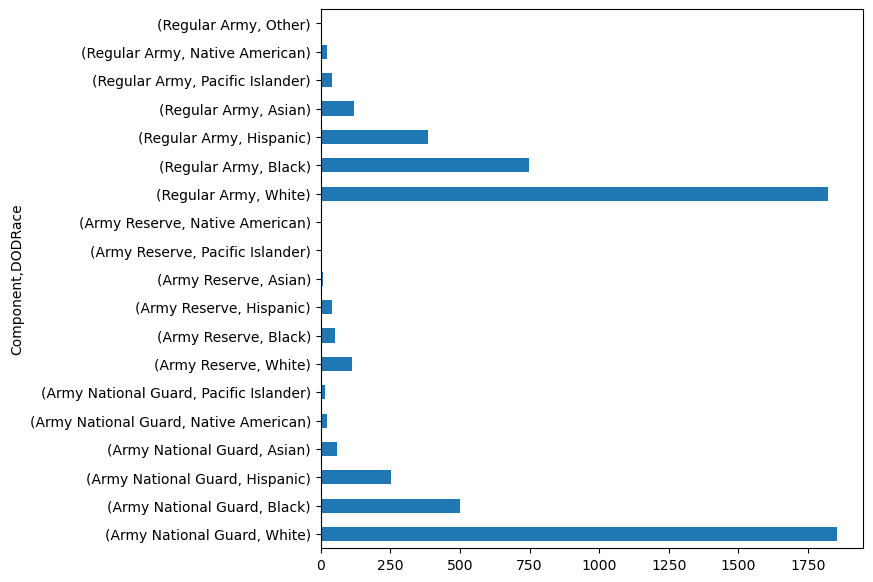

In [41]:
df.groupby(["Component"])["DODRace"].value_counts().plot(kind="barh", figsize=(7, 7))

In [42]:
ct = pd.crosstab( df.Component,df.DODRace, margins=True, margins_name="Total", normalize='index')
ct


DODRace,Asian,Black,Hispanic,Native American,Other,Pacific Islander,White
Component,,,,,,,
Army National Guard,0.022157,0.184269,0.093427,0.008863,0.000000,0.006278,0.685007
Army Reserve,0.040909,0.236364,0.186364,0.004545,0.000000,0.013636,0.518182
Regular Army,0.037898,0.237898,0.122611,0.007643,0.000955,0.012420,0.580573
Total,0.030982,0.213909,0.111898,0.008075,0.000494,0.009723,0.624918


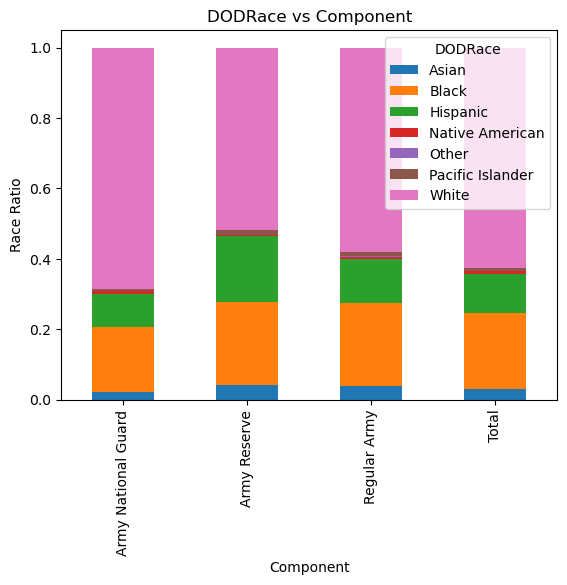

In [43]:
ct.plot(kind='bar', stacked=True)
plt.title('DODRace vs Component')
plt.xlabel('Component')
plt.ylabel('Race Ratio')
plt.show()

In [44]:
df.groupby(["Component", "Branch"])["DODRace"].value_counts(normalize=True)

# we obtained insights similar to the insights we obtained above.
# There are no Hispanic-dominated components or branches.
# We will drop "Component", "Branch" features.

Component            Branch                  DODRace         
Army National Guard  Combat Arms             White               0.771995
                                             Black               0.097893
                                             Hispanic            0.091698
                                             Asian               0.022305
                                             Native American     0.011152
                                             Pacific Islander    0.004957
                     Combat Service Support  White               0.643509
                                             Black               0.218947
                                             Hispanic            0.099649
                                             Asian               0.023158
                                             Pacific Islander    0.007719
                                             Native American     0.007018
                     Combat Support          White

In [45]:
ct = pd.crosstab( df.DODRace, [df.Component, df.Branch],  margins=True, margins_name="Total", normalize='columns')
ct

Component        Army National Guard                                        \
Branch                   Combat Arms Combat Service Support Combat Support   
DODRace                                                                      
Asian                       0.022305               0.023158       0.018908   
Black                       0.097893               0.218947       0.226891   
Hispanic                    0.091698               0.099649       0.077731   
Native American             0.011152               0.007018       0.010504   
Other                       0.000000               0.000000       0.000000   
Pacific Islander            0.004957               0.007719       0.004202   
White                       0.771995               0.643509       0.661765   

Component        Army Reserve                                        \
Branch            Combat Arms Combat Service Support Combat Support   
DODRace                                                               
Asian                0.000000               0.047945       0.029412   
Black                0.000000               0.164384       0.411765   
Hispanic             0.166667               0.205479       0.147059   
Native American      0.000000               0.006849       0.000000   
Other                0.000000               0.000000       0.000000   
Pacific Islander     0.000000               0.013699       0.014706   
White                0.833333               0.561644       0.397059   

Component        Regular Army                                           Total  
Branch            Combat Arms Combat Service Support Combat Support            
DODRace                                                                        
Asian                0.033810               0.036806       0.044271  0.030982  
Black                0.122237               0.255147       0.317708  0.213909  
Hispanic             0.148244               0.120399       0.101562  0.111898  
Native American      0.009103               0.008734       0.003906  0.008075  
Other                0.001300               0.001248       0.000000  0.000494  
Pacific Islander     0.011704               0.008734       0.020833  0.009723  
White                0.673602               0.568933       0.511719  0.624918

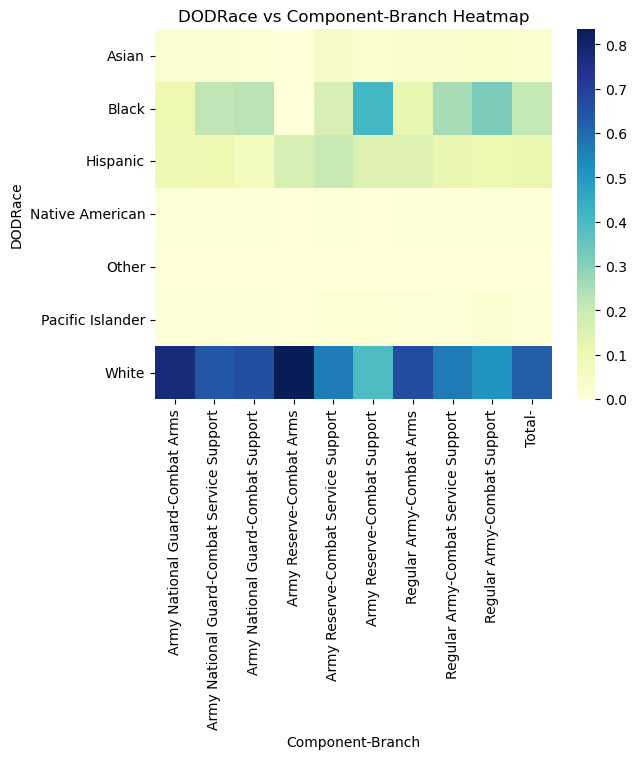

In [46]:
# Seaborn
sns.heatmap(ct, annot=False, fmt='.2f', cmap='YlGnBu', cbar=True)
plt.title('DODRace vs Component-Branch Heatmap')
plt.show()

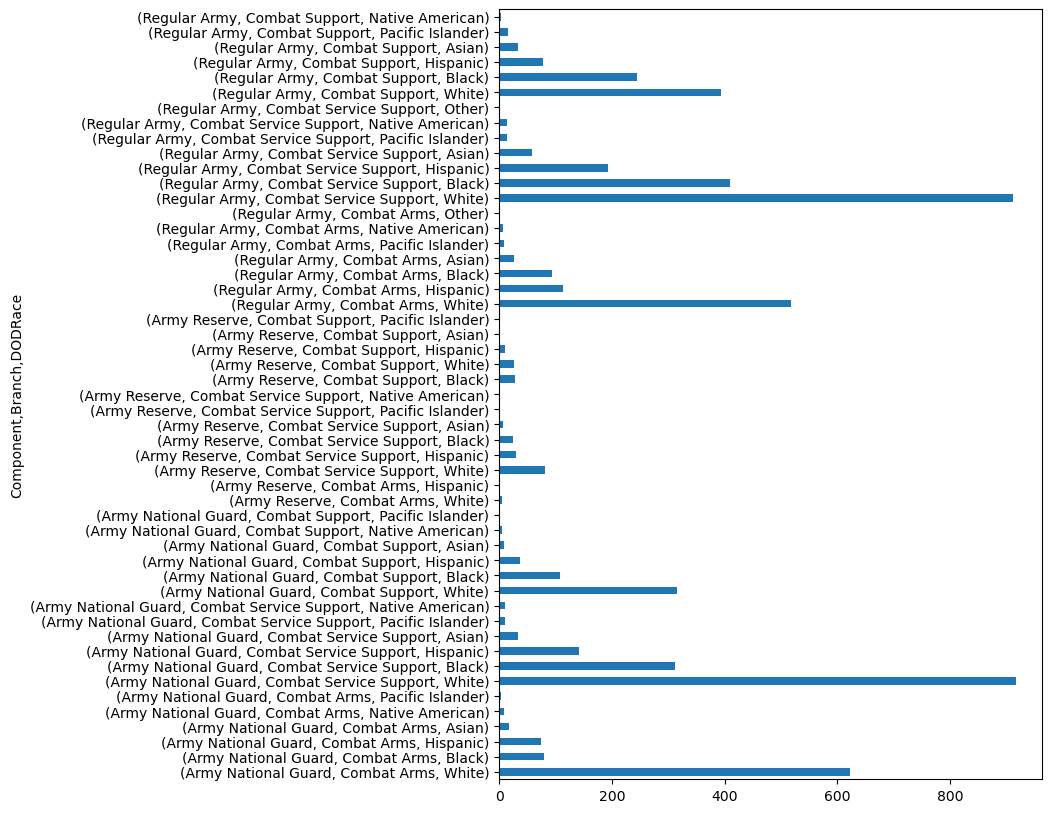

In [47]:
df.groupby(["Component", "Branch"])["DODRace"].value_counts().plot(
    kind="barh", figsize=(7, 10)
);

In [48]:
df.SubjectNumericRace.value_counts()

# a feature describing our target DODRace.
# We will drop it as it will cause data leakage.

SubjectNumericRace
1        3561
2        1026
3         541
31        160
51        126
8         116
4         109
21         60
6          59
41         46
61         35
23         34
28         26
251        20
5          18
18         18
25         14
351        10
38          9
64          8
62          8
35          8
42          7
63          7
231         6
43          5
235         4
218         3
651         2
2351        2
318         2
641         2
451         2
423         2
431         2
2518        2
48          1
631         1
4251        1
428         1
238         1
358         1
425         1
42351       1
Name: count, dtype: int64

In [49]:
drop_list2 = [
    "Date",
    "Installation",
    "Component",
    "Branch",
    "PrimaryMOS",
    "Weightlbs",
    "Heightin",
    "subjectid",
    "SubjectNumericRace",
]

df.drop(columns=drop_list2, inplace=True)

# We drop the "Weightlbs", "Heightin" features as they consist of information
# that soldiers self-report.
# height and weight information is measured and included in the data
# as a separate feature.
# Since subjectid is the unique registration number of the soldiers,
# it will cause leakage.

In [50]:
df.shape

(6068, 98)

In [51]:
df.DODRace.value_counts()

DODRace
White               3792
Black               1298
Hispanic             679
Asian                188
Pacific Islander      59
Native American       49
Other                  3
Name: count, dtype: int64

In [52]:
df2 = df[df["DODRace"].isin(["White", "Black", "Hispanic"])]
df2

,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,bicristalbreadth,...,waistfrontlengthsitting,waistheightomphalion,weightkg,wristcircumference,wristheight,Gender,SubjectsBirthLocation,DODRace,Age,WritingPreference
0,266,1467,337,222,1347,253,202,401,369,274,...,440,1054,815,175,853,Male,North Dakota,White,41,Right hand
1,233,1395,326,220,1293,245,193,394,338,257,...,371,1054,726,167,815,Male,New York,White,35,Left hand
2,287,1430,341,230,1327,256,196,427,408,261,...,411,1041,929,180,831,Male,New York,Black,42,Left hand
3,234,1347,310,230,1239,262,199,401,359,262,...,399,968,794,176,793,Male,Wisconsin,White,31,Right hand
4,250,1585,372,247,1478,267,224,435,356,263,...,379,1245,946,188,954,Male,North Carolina,Black,21,Right hand
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6063,285,1392,335,223,1297,252,196,368,299,312,...,370,1002,832,162,836,Female,Texas,Hispanic,51,Right hand
6064,262,1324,301,202,1204,236,181,378,294,287,...,374,958,717,157,804,Female,Texas,Hispanic,40,Right hand
6065,260,1334,318,213,1259,234,183,363,332,299,...,351,970,762,159,774,Female,Texas,Black,40,Right hand
6066,205,1293,302,199,1207,213,163,376,276,280,...,335,952,632,146,769,Female,Texas,Hispanic,31,Right hand


In [53]:
df2.reset_index(drop=True, inplace=True)

In [54]:
df2

,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,bicristalbreadth,...,waistfrontlengthsitting,waistheightomphalion,weightkg,wristcircumference,wristheight,Gender,SubjectsBirthLocation,DODRace,Age,WritingPreference
0,266,1467,337,222,1347,253,202,401,369,274,...,440,1054,815,175,853,Male,North Dakota,White,41,Right hand
1,233,1395,326,220,1293,245,193,394,338,257,...,371,1054,726,167,815,Male,New York,White,35,Left hand
2,287,1430,341,230,1327,256,196,427,408,261,...,411,1041,929,180,831,Male,New York,Black,42,Left hand
3,234,1347,310,230,1239,262,199,401,359,262,...,399,968,794,176,793,Male,Wisconsin,White,31,Right hand
4,250,1585,372,247,1478,267,224,435,356,263,...,379,1245,946,188,954,Male,North Carolina,Black,21,Right hand
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5764,285,1392,335,223,1297,252,196,368,299,312,...,370,1002,832,162,836,Female,Texas,Hispanic,51,Right hand
5765,262,1324,301,202,1204,236,181,378,294,287,...,374,958,717,157,804,Female,Texas,Hispanic,40,Right hand
5766,260,1334,318,213,1259,234,183,363,332,299,...,351,970,762,159,774,Female,Texas,Black,40,Right hand
5767,205,1293,302,199,1207,213,163,376,276,280,...,335,952,632,146,769,Female,Texas,Hispanic,31,Right hand


In [55]:
def format_row_based_on_comparison(row):
    # Compare the second column with the first column
    if row.iloc[2] >= row.iloc[1]:
        return ['color: red'] * len(row)
    elif row.iloc[7] > (row.iloc[6] + (row.iloc[6] - row.iloc[4]) * 1.5) or row.iloc[3] < (row.iloc[4] - (row.iloc[6] - row.iloc[4]) * 1.5):
        return ['color: orange'] * len(row)
    else:
        return [''] * len(row)

In [56]:
# Apply the custom formatting function to each row
styled_df = df2.describe().T.style.apply(format_row_based_on_comparison, axis=1)

# Display the formatted DataFrame
styled_df

# From the dataframe below, we conclude that there are some outliers based on feature statsitics but not many

,count,mean,std,min,25%,50%,75%,max
abdominalextensiondepthsitting,5769.000000,247.254290,37.457748,155.000000,220.000000,243.000000,272.000000,451.000000
acromialheight,5769.000000,1408.630265,78.303123,1146.000000,1353.000000,1412.000000,1464.000000,1683.000000
acromionradialelength,5769.000000,328.071590,20.444554,249.000000,314.000000,328.000000,342.000000,393.000000
anklecircumference,5769.000000,225.201768,15.965783,156.000000,214.000000,225.000000,235.000000,293.000000
axillaheight,5769.000000,1301.902583,71.260913,1062.000000,1252.000000,1304.000000,1351.000000,1553.000000
balloffootcircumference,5769.000000,244.408043,16.803556,186.000000,233.000000,245.000000,256.000000,306.000000
balloffootlength,5769.000000,195.118911,13.379000,151.000000,186.000000,196.000000,205.000000,245.000000
biacromialbreadth,5769.000000,399.706015,30.124094,283.000000,377.000000,404.000000,422.000000,489.000000
bicepscircumferenceflexed,5769.000000,341.663027,41.270615,216.000000,312.000000,342.000000,370.000000,490.000000
bicristalbreadth,5769.000000,274.903449,19.239580,197.000000,262.000000,274.000000,288.000000,362.000000


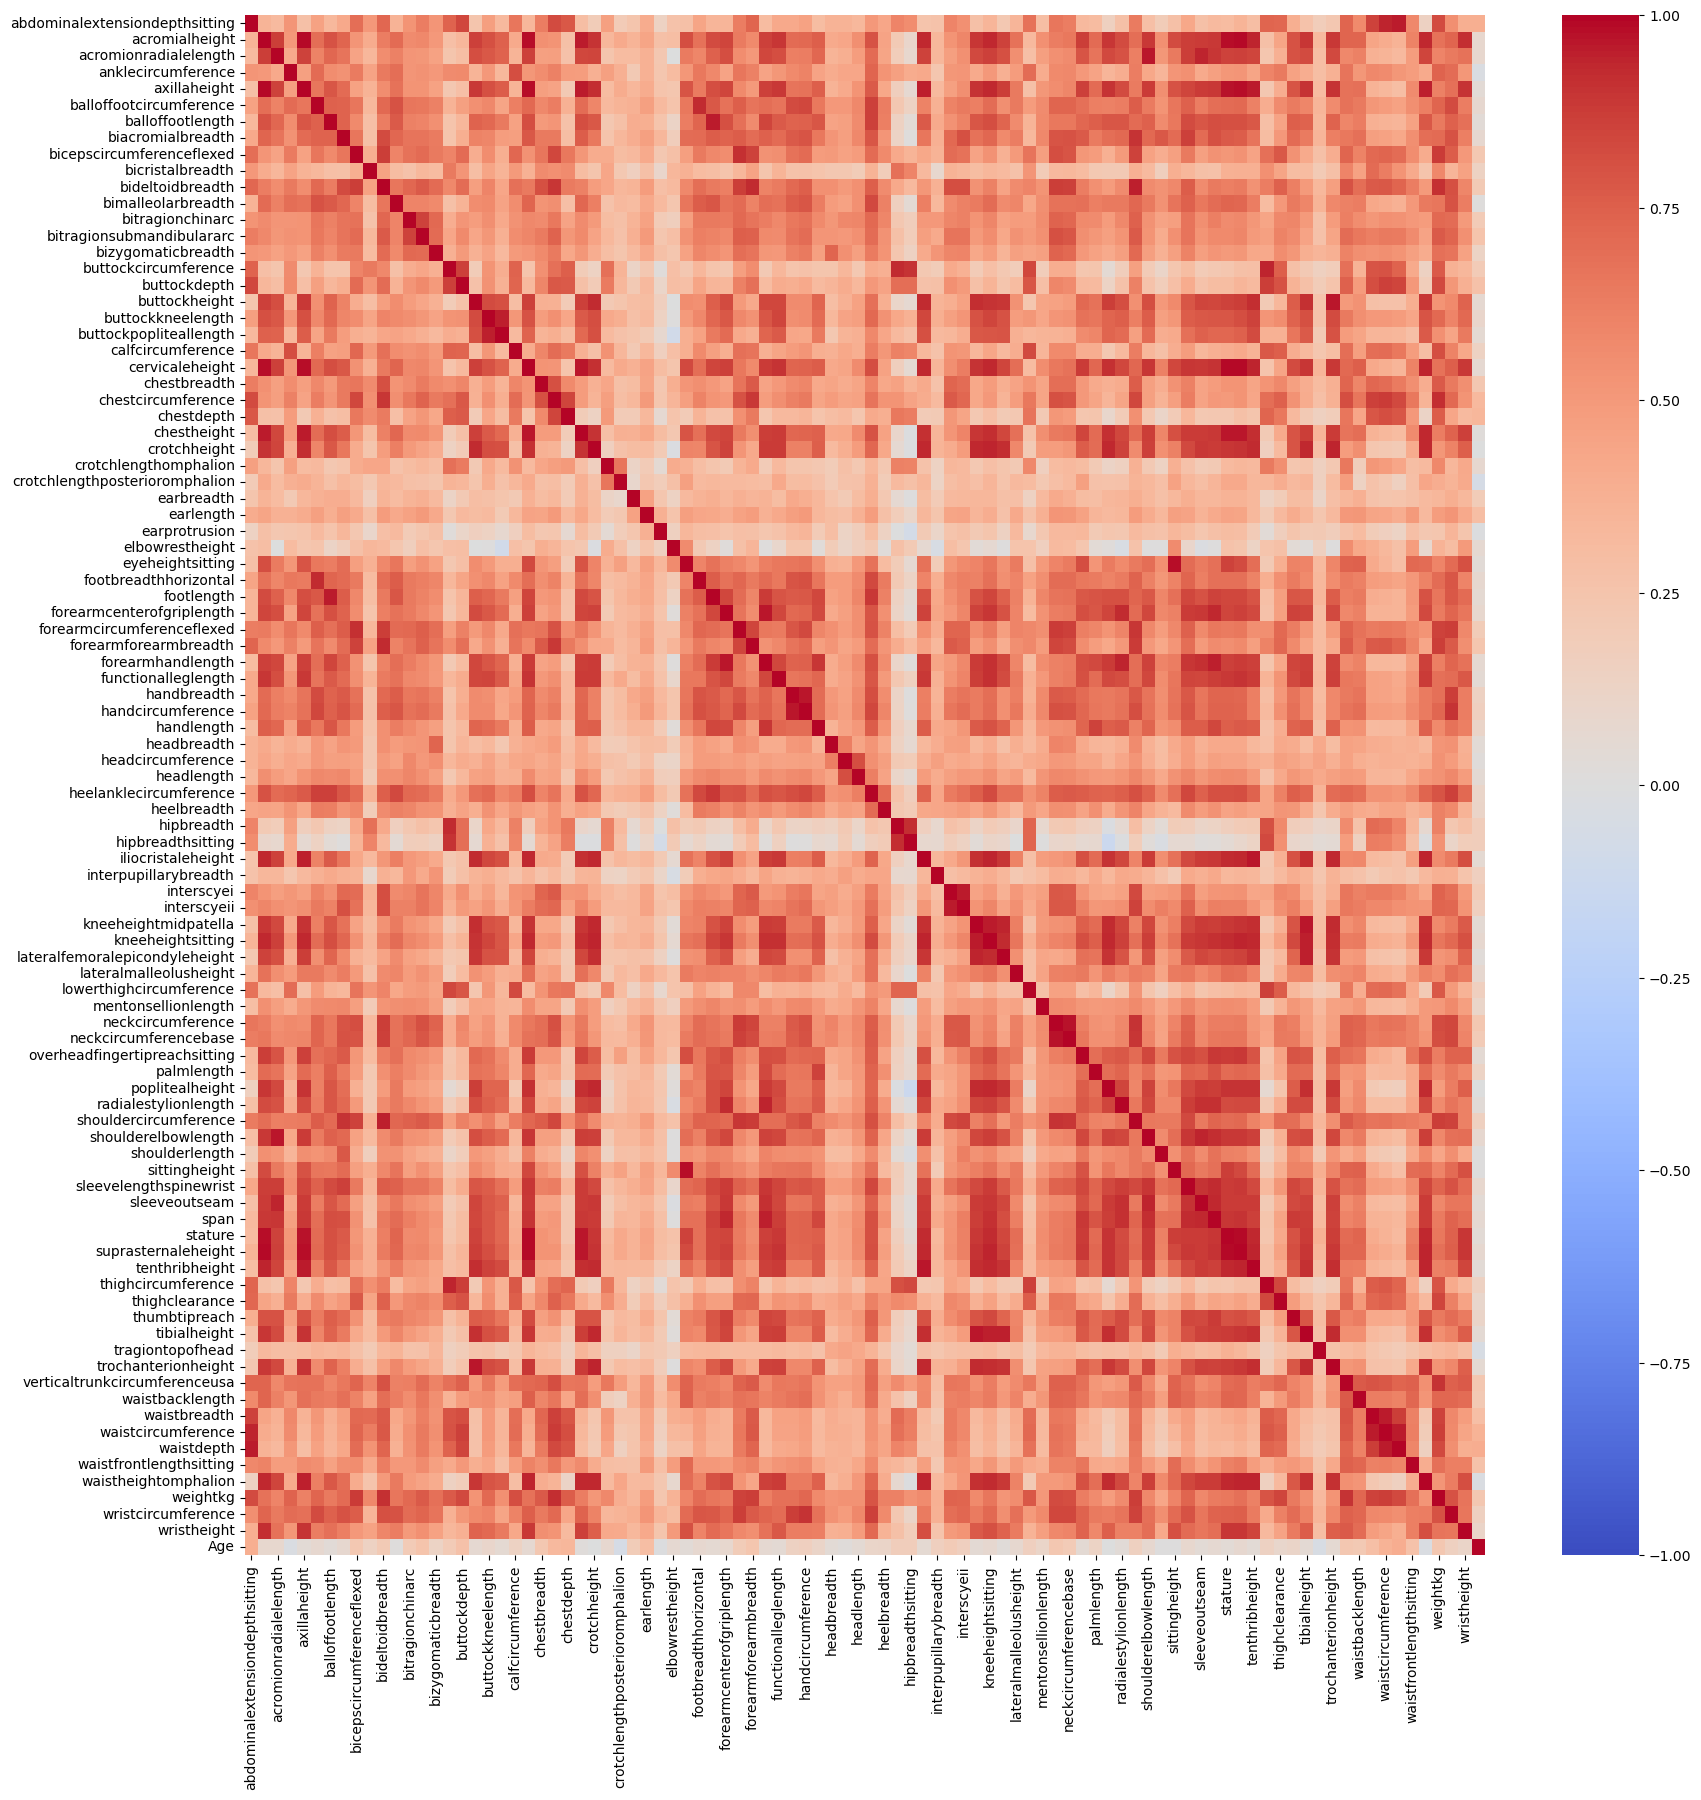

In [59]:
plt.figure(figsize=(20, 20))
sns.heatmap(df2.corr(numeric_only=True), vmin=-1, vmax=1, cmap="coolwarm");

# has a multicollinearity issue, but it's fine for logregg with regularisation and non-parametric algorithms.

# DATA Preprocessing
- In this step we divide our data to X(Features) and y(Target) then ,
- To train and evaluation purposes we create train and test sets,
- Lastly, scale our data if features not in same scale. Why?

In [60]:
X = df2.drop(columns=["DODRace"])
y = df2.DODRace

In [61]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=101, stratify=y)

In [62]:
print("Train features shape : ", X_train.shape)
print("Train target shape   : ", y_train.shape)
print("Test features shape  : ", X_test.shape)
print("Test target shape    : ", y_test.shape)

Train features shape :  (4615, 97)
Train target shape   :  (4615,)
Test features shape  :  (1154, 97)
Test target shape    :  (1154,)


# Modelling
- Fit the model with train dataset
- Get predict from vanilla model on both train and test sets to check if there is over/underfitting   
- Apply GridseachCV for both hyperparemeter tuning and sanity check of our model.
- Use hyperparameters that you find from gridsearch and make final prediction and evaluate the result according to chosen metric.

## 1. Logistic model

### Vanilla Logistic Model

In [154]:
def eval_metric(model, X_train, y_train, X_test, y_test):
    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)

    print("Test_Set")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print()
    print("Train_Set")
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))

In [155]:
cat = X_train.select_dtypes("object").columns
cat

Index(['Gender', 'SubjectsBirthLocation', 'WritingPreference'], dtype='object')

In [156]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, StandardScaler

column_trans = make_column_transformer(
    (OneHotEncoder(handle_unknown="ignore", sparse_output=False), cat),
    remainder=MinMaxScaler(),
    verbose_feature_names_out=False,
)

In [157]:
from sklearn.pipeline import Pipeline

operations = [
    ("OneHotEncoder", column_trans),
    (
        "log",
        LogisticRegression(class_weight="balanced", max_iter=10000, random_state=101),
    ),
]

pipe_log_model = Pipeline(steps=operations)

In [158]:
pipe_log_model.fit(X_train, y_train)
eval_metric(pipe_log_model, X_train, y_train, X_test, y_test)

Test_Set
[[235  14  11]
 [  6 111  19]
 [ 28  88 642]]
              precision    recall  f1-score   support

       Black       0.87      0.90      0.89       260
    Hispanic       0.52      0.82      0.64       136
       White       0.96      0.85      0.90       758

    accuracy                           0.86      1154
   macro avg       0.78      0.86      0.81      1154
weighted avg       0.89      0.86      0.86      1154


Train_Set
[[ 948   56   34]
 [  27  445   71]
 [  55  360 2619]]
              precision    recall  f1-score   support

       Black       0.92      0.91      0.92      1038
    Hispanic       0.52      0.82      0.63       543
       White       0.96      0.86      0.91      3034

    accuracy                           0.87      4615
   macro avg       0.80      0.87      0.82      4615
weighted avg       0.90      0.87      0.88      4615



### Logistic Model GridsearchCV

In [68]:
recall_Hispanic = make_scorer(recall_score, average=None, labels=["Hispanic"])

In [69]:
param_grid = {
    "log__C": [0.5, 1],
    "log__penalty": ["l1", "l2"],
    "log__solver": ["liblinear", "lbfgs"],
}

In [70]:
operations = [
    ("OneHotEncoder", column_trans),
    (
        "log",
        LogisticRegression(class_weight="balanced", max_iter=10000, random_state=101),
    ),
]

model = Pipeline(steps=operations)


log_model_grid = GridSearchCV(
    model,
    param_grid,
    scoring=recall_Hispanic,
    cv=10,
    n_jobs=-1,
    return_train_score=True,
)

In [71]:
log_model_grid.fit(X_train, y_train)

C:\Users\aseel\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
20 fits failed out of a total of 80.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\aseel\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\aseel\anaconda3\Lib\site-packages\sklearn\base.py", line 1152, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\aseel\anaconda3\Lib\site-packages\sklearn\pipeline.py", line 427, in fit
    self._final_estimator.fit

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('OneHotEncoder',
                                        ColumnTransformer(remainder=MinMaxScaler(),
                                                          transformers=[('onehotencoder',
                                                                         OneHotEncoder(handle_unknown='ignore',
                                                                                       sparse_output=False),
                                                                         Index(['Gender', 'SubjectsBirthLocation', 'WritingPreference'], dtype='object'))],
                                                          verbose_feature_names_out=False)),
                                       ('log',
                                        LogisticRegression(class_weight='balanced',
                                                           max_iter=10000,
                                                           random_state=101))]),
             n_jobs=-1,
             param_grid={'log__C': [0.5, 1], 'log__penalty': ['l1', 'l2'],
                         'log__solver': ['liblinear', 'lbfgs']},
             return_train_score=True,
             scoring=make_scorer(recall_score, average=None, labels=['Hispanic']))

In [72]:
log_model_grid.best_estimator_

Pipeline(steps=[('OneHotEncoder',
                 ColumnTransformer(remainder=MinMaxScaler(),
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  Index(['Gender', 'SubjectsBirthLocation', 'WritingPreference'], dtype='object'))],
                                   verbose_feature_names_out=False)),
                ('log',
                 LogisticRegression(C=1, class_weight='balanced',
                                    max_iter=10000, random_state=101))])

In [76]:
pd.DataFrame(log_model_grid.cv_results_).loc[
    log_model_grid.best_index_, ["mean_test_score", "mean_train_score"]
]

mean_test_score     0.771515
mean_train_score    0.827909
Name: 7, dtype: object

In [77]:
eval_metric(log_model_grid, X_train, y_train, X_test, y_test)

Test_Set
[[235  14  11]
 [  6 111  19]
 [ 28  88 642]]
              precision    recall  f1-score   support

       Black       0.87      0.90      0.89       260
    Hispanic       0.52      0.82      0.64       136
       White       0.96      0.85      0.90       758

    accuracy                           0.86      1154
   macro avg       0.78      0.86      0.81      1154
weighted avg       0.89      0.86      0.86      1154


Train_Set
[[ 948   56   34]
 [  27  445   71]
 [  55  360 2619]]
              precision    recall  f1-score   support

       Black       0.92      0.91      0.92      1038
    Hispanic       0.52      0.82      0.63       543
       White       0.96      0.86      0.91      3034

    accuracy                           0.87      4615
   macro avg       0.80      0.87      0.82      4615
weighted avg       0.90      0.87      0.88      4615



## Logistic Regression solver "liblenear" for small dataset

In [79]:
operations = [
    ("OneHotEncoder", column_trans),
    (
        "log",
        LogisticRegression(
            class_weight="balanced",
            max_iter=10000,
            random_state=101,
            solver="liblinear",
            penalty="l1",
        ),
    ),
]

pipe_log_model_libl = Pipeline(steps=operations)

# Since it is stated in the logistic regression documentation that liblinear is
# a good choice as a solver for small datasets.
# We are using liblinear. It can be used with liblinear l2 and l1.
# but we preferred l1 as it gives better scores with l1 than l2.

In [80]:
pipe_log_model_libl.fit(X_train, y_train)
eval_metric(pipe_log_model_libl, X_train, y_train, X_test, y_test)

Test_Set
[[239   6  15]
 [  5  96  35]
 [ 20  34 704]]
              precision    recall  f1-score   support

       Black       0.91      0.92      0.91       260
    Hispanic       0.71      0.71      0.71       136
       White       0.93      0.93      0.93       758

    accuracy                           0.90      1154
   macro avg       0.85      0.85      0.85      1154
weighted avg       0.90      0.90      0.90      1154


Train_Set
[[ 956   34   48]
 [  33  387  123]
 [  43  145 2846]]
              precision    recall  f1-score   support

       Black       0.93      0.92      0.92      1038
    Hispanic       0.68      0.71      0.70       543
       White       0.94      0.94      0.94      3034

    accuracy                           0.91      4615
   macro avg       0.85      0.86      0.85      4615
weighted avg       0.91      0.91      0.91      4615



## 2. SVC

### Vanilla SVC model

In [82]:
operations_svc = [
    ("OneHotEncoder", column_trans),
    ("svc", SVC(class_weight="balanced", random_state=101)),
]

pipe_svc_model = Pipeline(steps=operations_svc)

In [83]:
pipe_svc_model.fit(X_train, y_train)

eval_metric(pipe_svc_model, X_train, y_train, X_test, y_test)

Test_Set
[[235  13  12]
 [  4 109  23]
 [ 20 100 638]]
              precision    recall  f1-score   support

       Black       0.91      0.90      0.91       260
    Hispanic       0.49      0.80      0.61       136
       White       0.95      0.84      0.89       758

    accuracy                           0.85      1154
   macro avg       0.78      0.85      0.80      1154
weighted avg       0.88      0.85      0.86      1154


Train_Set
[[ 950   52   36]
 [  22  452   69]
 [  55  399 2580]]
              precision    recall  f1-score   support

       Black       0.93      0.92      0.92      1038
    Hispanic       0.50      0.83      0.63       543
       White       0.96      0.85      0.90      3034

    accuracy                           0.86      4615
   macro avg       0.80      0.87      0.82      4615
weighted avg       0.90      0.86      0.87      4615



In [85]:
param_grid = {"svc__C": [0.5, 1], "svc__gamma": ["scale", "auto", 0.01]}

In [86]:
operations_svc = [
    ("OneHotEncoder", column_trans),
    ("svc", SVC(class_weight="balanced", random_state=101)),
]

model = Pipeline(steps=operations_svc)

svm_model_grid = GridSearchCV(
    model,
    param_grid,
    scoring=recall_Hispanic,
    cv=10,
    n_jobs=-1,
    return_train_score=True,
)

In [87]:
svm_model_grid.fit(X_train, y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('OneHotEncoder',
                                        ColumnTransformer(remainder=MinMaxScaler(),
                                                          transformers=[('onehotencoder',
                                                                         OneHotEncoder(handle_unknown='ignore',
                                                                                       sparse_output=False),
                                                                         Index(['Gender', 'SubjectsBirthLocation', 'WritingPreference'], dtype='object'))],
                                                          verbose_feature_names_out=False)),
                                       ('svc',
                                        SVC(class_weight='balanced',
                                            random_state=101))]),
             n_jobs=-1,
             param_grid={'svc__C': [0.5, 1],
                         'svc__gamma': ['scale', 'auto', 0.01]},
             return_train_score=True,
             scoring=make_scorer(recall_score, average=None, labels=['Hispanic']))

In [88]:
svm_model_grid.best_estimator_

Pipeline(steps=[('OneHotEncoder',
                 ColumnTransformer(remainder=MinMaxScaler(),
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  Index(['Gender', 'SubjectsBirthLocation', 'WritingPreference'], dtype='object'))],
                                   verbose_feature_names_out=False)),
                ('svc', SVC(C=1, class_weight='balanced', random_state=101))])

In [89]:
pd.DataFrame(svm_model_grid.cv_results_).loc[
    svm_model_grid.best_index_, ["mean_test_score", "mean_train_score"]
]

mean_test_score     0.758552
mean_train_score     0.83425
Name: 3, dtype: object

In [90]:
eval_metric(svm_model_grid, X_train, y_train, X_test, y_test)

Test_Set
[[235  13  12]
 [  4 109  23]
 [ 20 100 638]]
              precision    recall  f1-score   support

       Black       0.91      0.90      0.91       260
    Hispanic       0.49      0.80      0.61       136
       White       0.95      0.84      0.89       758

    accuracy                           0.85      1154
   macro avg       0.78      0.85      0.80      1154
weighted avg       0.88      0.85      0.86      1154


Train_Set
[[ 950   52   36]
 [  22  452   69]
 [  55  399 2580]]
              precision    recall  f1-score   support

       Black       0.93      0.92      0.92      1038
    Hispanic       0.50      0.83      0.63       543
       White       0.96      0.85      0.90      3034

    accuracy                           0.86      4615
   macro avg       0.80      0.87      0.82      4615
weighted avg       0.90      0.86      0.87      4615



## 3. RF

In [93]:
from sklearn.preprocessing import OrdinalEncoder


ord_enc = OrdinalEncoder(handle_unknown="use_encoded_value", unknown_value=-1)

column_trans = make_column_transformer((ord_enc, cat), remainder="passthrough")

### Vanilla RF Model

In [94]:
operations_rf = [
    ("OrdinalEncoder", column_trans),
    ("RF_model", RandomForestClassifier(class_weight="balanced", random_state=101)),
]

pipe_model_rf = Pipeline(steps=operations_rf)

pipe_model_rf.fit(X_train, y_train)

Pipeline(steps=[('OrdinalEncoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  Index(['Gender', 'SubjectsBirthLocation', 'WritingPreference'], dtype='object'))])),
                ('RF_model',
                 RandomForestClassifier(class_weight='balanced',
                                        random_state=101))])

In [95]:
eval_metric(pipe_model_rf, X_train, y_train, X_test, y_test)

Test_Set
[[195   0  65]
 [  9   4 123]
 [ 14   2 742]]
              precision    recall  f1-score   support

       Black       0.89      0.75      0.82       260
    Hispanic       0.67      0.03      0.06       136
       White       0.80      0.98      0.88       758

    accuracy                           0.82      1154
   macro avg       0.79      0.59      0.58      1154
weighted avg       0.80      0.82      0.77      1154


Train_Set
[[1038    0    0]
 [   0  542    1]
 [   0    0 3034]]
              precision    recall  f1-score   support

       Black       1.00      1.00      1.00      1038
    Hispanic       1.00      1.00      1.00       543
       White       1.00      1.00      1.00      3034

    accuracy                           1.00      4615
   macro avg       1.00      1.00      1.00      4615
weighted avg       1.00      1.00      1.00      4615



### RF Model GridsearchCV

In [98]:
param_grid = {
    "RF_model__n_estimators": [400, 500],
    "RF_model__max_depth": [2, 3],
    # 'RF_model__min_samples_split':[18,20,22],
    # 'RF_model__max_features': ['auto', None, 15, 20]
}

In [99]:
operations_rf = [
    ("OrdinalEncoder", column_trans),
    ("RF_model", RandomForestClassifier(class_weight="balanced", random_state=101)),
]

model = Pipeline(steps=operations_rf)
rf_grid_model = GridSearchCV(
    model, param_grid, scoring=recall_Hispanic, n_jobs=-1, return_train_score=True
)

In [100]:
rf_grid_model.fit(X_train, y_train)

GridSearchCV(estimator=Pipeline(steps=[('OrdinalEncoder',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('ordinalencoder',
                                                                         OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                        unknown_value=-1),
                                                                         Index(['Gender', 'SubjectsBirthLocation', 'WritingPreference'], dtype='object'))])),
                                       ('RF_model',
                                        RandomForestClassifier(class_weight='balanced',
                                                               random_state=101))]),
             n_jobs=-1,
             param_grid={'RF_model__max_depth': [2, 3],
                         'RF_model__n_estimators': [400, 500]},
             return_train_score=True,
             scoring=make_scorer(recall_score, average=None, labels=['Hispanic']))

In [101]:
rf_grid_model.best_estimator_

Pipeline(steps=[('OrdinalEncoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  Index(['Gender', 'SubjectsBirthLocation', 'WritingPreference'], dtype='object'))])),
                ('RF_model',
                 RandomForestClassifier(class_weight='balanced', max_depth=3,
                                        n_estimators=400, random_state=101))])

In [102]:
rf_grid_model.best_params_

{'RF_model__max_depth': 3, 'RF_model__n_estimators': 400}

In [103]:
pd.DataFrame(rf_grid_model.cv_results_).loc[
    rf_grid_model.best_index_, ["mean_test_score", "mean_train_score"]
]

mean_test_score     0.609582
mean_train_score    0.663906
Name: 2, dtype: object

In [104]:
rf_grid_model.best_score_

0.6095820591233435

In [105]:
eval_metric(rf_grid_model, X_train, y_train, X_test, y_test)

Test_Set
[[197  36  27]
 [ 17  77  42]
 [ 91 230 437]]
              precision    recall  f1-score   support

       Black       0.65      0.76      0.70       260
    Hispanic       0.22      0.57      0.32       136
       White       0.86      0.58      0.69       758

    accuracy                           0.62      1154
   macro avg       0.58      0.63      0.57      1154
weighted avg       0.74      0.62      0.65      1154


Train_Set
[[ 797  142   99]
 [  47  355  141]
 [ 241 1035 1758]]
              precision    recall  f1-score   support

       Black       0.73      0.77      0.75      1038
    Hispanic       0.23      0.65      0.34       543
       White       0.88      0.58      0.70      3034

    accuracy                           0.63      4615
   macro avg       0.62      0.67      0.60      4615
weighted avg       0.77      0.63      0.67      4615



## 4. XGBoost

### Vanilla XGBoost Model

In [115]:
operations_xgb = [
    ("OrdinalEncoder", column_trans),
    ("XGB_model", XGBClassifier(random_state=101)),
]

pipe_model_xgb = Pipeline(steps=operations_xgb)
# sorting will be same as classification_report.
y_train_xgb = y_train.map({"Black": 0, "Hispanic": 1, "White": 2})
y_test_xgb = y_test.map({"Black": 0, "Hispanic": 1, "White": 2})
# If the target is not numeric in xgb 1.6 and higher versions, it returns an error.
# That's why we do the conversion manually.


pipe_model_xgb.fit(X_train, y_train_xgb)

Pipeline(steps=[('OrdinalEncoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  Index(['Gender', 'SubjectsBirthLocation', 'WritingPreference'], dtype='object'))])),
                ('XGB_model',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None...
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=None, n_jobs=None,
                               num_parallel_tree=None,
                               objective='multi:softprob', ...))])

In [116]:
eval_metric(pipe_model_xgb, X_train, y_train_xgb, X_test, y_test_xgb)

Test_Set
[[227   5  28]
 [ 14  56  66]
 [ 15  11 732]]
              precision    recall  f1-score   support

           0       0.89      0.87      0.88       260
           1       0.78      0.41      0.54       136
           2       0.89      0.97      0.92       758

    accuracy                           0.88      1154
   macro avg       0.85      0.75      0.78      1154
weighted avg       0.87      0.88      0.87      1154


Train_Set
[[1038    0    0]
 [   0  543    0]
 [   0    0 3034]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1038
           1       1.00      1.00      1.00       543
           2       1.00      1.00      1.00      3034

    accuracy                           1.00      4615
   macro avg       1.00      1.00      1.00      4615
weighted avg       1.00      1.00      1.00      4615



In [117]:
from sklearn.utils import class_weight

classes_weights = class_weight.compute_sample_weight(
    class_weight="balanced", y=y_train_xgb
)
classes_weights

# XGboost algorithm has no class_weight hyperparameter for multiclass.
# We can use the sample_weight hyperparameter within the fit function.

array([2.8330264 , 0.50703142, 0.50703142, ..., 0.50703142, 1.4820167 ,
       0.50703142])

In [118]:
my_dict = {"weights": classes_weights, "label": y_train_xgb}

comp = pd.DataFrame(my_dict)

comp.head()

,weights,label
893,2.833026,1
196,0.507031,2
3821,0.507031,2
3206,0.507031,2
4500,1.482017,0


In [ ]:
comp.groupby("label").value_counts()

# weight x class will give us the same results.

label  weights 
0      1.482017    1038
1      2.833026     543
2      0.507031    3034
dtype: int64

In [ ]:
pipe_model_xgb.fit(X_train, y_train_xgb, XGB_model__sample_weight=classes_weights)
# weight parameter in XGBoost is per instance not per class. Therefore,
# we need to assign the weight of each class to its instances,
# which is the same thing.

Pipeline(steps=[('OrdinalEncoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  Index(['Gender', 'SubjectsBirthLocation', 'WritingPreference'], dtype='object'))])),
                ('XGB_model',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None...
                               grow_policy=None, importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, n_estimators=100,
                               n_jobs=None, num_parallel_tree=None,
                               objective='multi:softprob', predictor=None, ...))])

In [ ]:
eval_metric(pipe_model_xgb, X_train, y_train_xgb, X_test, y_test_xgb)

Test_Set
[[227   9  24]
 [ 13  65  58]
 [ 21  19 718]]
              precision    recall  f1-score   support

           0       0.87      0.87      0.87       260
           1       0.70      0.48      0.57       136
           2       0.90      0.95      0.92       758

    accuracy                           0.88      1154
   macro avg       0.82      0.77      0.79      1154
weighted avg       0.87      0.88      0.87      1154


Train_Set
[[1038    0    0]
 [   0  543    0]
 [   0    0 3034]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1038
           1       1.00      1.00      1.00       543
           2       1.00      1.00      1.00      3034

    accuracy                           1.00      4615
   macro avg       1.00      1.00      1.00      4615
weighted avg       1.00      1.00      1.00      4615



In [ ]:
scoring_xgb = {
    "precision_Hispanic": make_scorer(precision_score, average=None, labels=[1]),
    "recall_Hispanic": make_scorer(recall_score, average=None, labels=[1]),
    "f1_Hispanic": make_scorer(f1_score, average=None, labels=[1]),
}

# Since xgb does not accept non-encoded targets, we arrange the scoring_xgb
# according to the 1 numeric class corresponding to hispanics.

In [ ]:
operations_xgb = [
    ("OrdinalEncoder", column_trans),
    ("XGB_model", XGBClassifier(random_state=101)),
]

model = Pipeline(steps=operations_xgb)

scores = cross_validate(
    model,
    X_train,
    y_train_xgb,
    scoring=scoring_xgb,
    cv=5,
    n_jobs=-1,
    return_train_score=True,
    fit_params={"XGB_model__sample_weight": classes_weights},
)
df_scores = pd.DataFrame(scores, index=range(1, 6))
df_scores.mean()[2:]

test_precision_Hispanic     0.730739
train_precision_Hispanic    1.000000
test_recall_Hispanic        0.484285
train_recall_Hispanic       1.000000
test_f1_Hispanic            0.581269
train_f1_Hispanic           1.000000
dtype: float64

### XGBoost Model GridsearchCV

In [119]:
param_grid = {
    "XGB_model__n_estimators": [20, 40],
    "XGB_model__max_depth": [1, 2],
    "XGB_model__learning_rate": [0.03, 0.05],
    "XGB_model__subsample": [0.8, 1],
    "XGB_model__colsample_bytree": [0.8, 1],
}

In [120]:
operations_xgb = [
    ("OrdinalEncoder", column_trans),
    ("XGB_model", XGBClassifier(random_state=101)),
]

model = Pipeline(steps=operations_xgb)

xgb_grid_model = GridSearchCV(
    model,
    param_grid,
    scoring=make_scorer(recall_score, average=None, labels=[1]),
    cv=5,
    n_jobs=-1,
    return_train_score=True,
)

In [121]:
xgb_grid_model.fit(X_train, y_train_xgb, XGB_model__sample_weight=classes_weights)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('OrdinalEncoder',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('ordinalencoder',
                                                                         OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                        unknown_value=-1),
                                                                         Index(['Gender', 'SubjectsBirthLocation', 'WritingPreference'], dtype='object'))])),
                                       ('XGB_model',
                                        XGBClassifier(base_score=None,
                                                      booster=None,
                                                      callbacks...
                                                      n_estimators=None,
                                                      n_jobs=None,
                                                      num_parallel_tree=None,
                                                      random_state=101, ...))]),
             n_jobs=-1,
             param_grid={'XGB_model__colsample_bytree': [0.8, 1],
                         'XGB_model__learning_rate': [0.03, 0.05],
                         'XGB_model__max_depth': [1, 2],
                         'XGB_model__n_estimators': [20, 40],
                         'XGB_model__subsample': [0.8, 1]},
             return_train_score=True,
             scoring=make_scorer(recall_score, average=None, labels=[1]))

In [122]:
xgb_grid_model.best_estimator_

Pipeline(steps=[('OrdinalEncoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  Index(['Gender', 'SubjectsBirthLocation', 'WritingPreference'], dtype='object'))])),
                ('XGB_model',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None...
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=0.05,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=2, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=40, n_jobs=None,
                               num_parallel_tree=None,
                               objective='multi:softprob', ...))])

In [123]:
xgb_grid_model.best_params_

{'XGB_model__colsample_bytree': 0.8,
 'XGB_model__learning_rate': 0.05,
 'XGB_model__max_depth': 2,
 'XGB_model__n_estimators': 40,
 'XGB_model__subsample': 1}

In [124]:
pd.DataFrame(xgb_grid_model.cv_results_).loc[
    xgb_grid_model.best_index_, ["mean_test_score", "mean_train_score"]
]

mean_test_score     0.587547
mean_train_score    0.663447
Name: 15, dtype: object

In [125]:
xgb_grid_model.best_score_

0.5875467210329596

In [126]:
eval_metric(xgb_grid_model, X_train, y_train_xgb, X_test, y_test_xgb)

Test_Set
[[200  36  24]
 [ 17  75  44]
 [103 156 499]]
              precision    recall  f1-score   support

           0       0.62      0.77      0.69       260
           1       0.28      0.55      0.37       136
           2       0.88      0.66      0.75       758

    accuracy                           0.67      1154
   macro avg       0.60      0.66      0.61      1154
weighted avg       0.75      0.67      0.69      1154


Train_Set
[[ 803  137   98]
 [  55  351  137]
 [ 281  610 2143]]
              precision    recall  f1-score   support

           0       0.71      0.77      0.74      1038
           1       0.32      0.65      0.43       543
           2       0.90      0.71      0.79      3034

    accuracy                           0.71      4615
   macro avg       0.64      0.71      0.65      4615
weighted avg       0.79      0.71      0.74      4615



---
---